In [ ]:
import numpy as np
import glob
import os
import pandas as pd
import scipy.signal as signal
import mne
import utils
import matplotlib.pyplot as plt

## Data pre-processing

In [ ]:
#create dataframe from CSV files
file_path= 'data/eeg_data_A/'
#eeg_dataframe_A.head()
#eeg_dataframe_A = utils.format_df(eeg_dataframe_A)
#eeg_dataframe_A.head()
eeg_dataframe = utils.gdf_to_df(file_path + 'A01T.gdf')


### Band-pass filtering  & ICA

In [ ]:
gdf_files = glob.glob(os.path.join(file_path, '*.gdf'))
channels = 25
method = 'fastica'
raw_objects = []  # List to store raw objects

for file in gdf_files:
    raw = mne.io.read_raw_gdf(file, preload=True)
    raw = raw.filter(l_freq=1.0, h_freq=40.0, verbose=False)
    ica = mne.preprocessing.ICA(n_components=channels, method=method)
    ica.fit(raw)
    raw_objects.append(raw)

Comparison between filtered data and unfiltered data

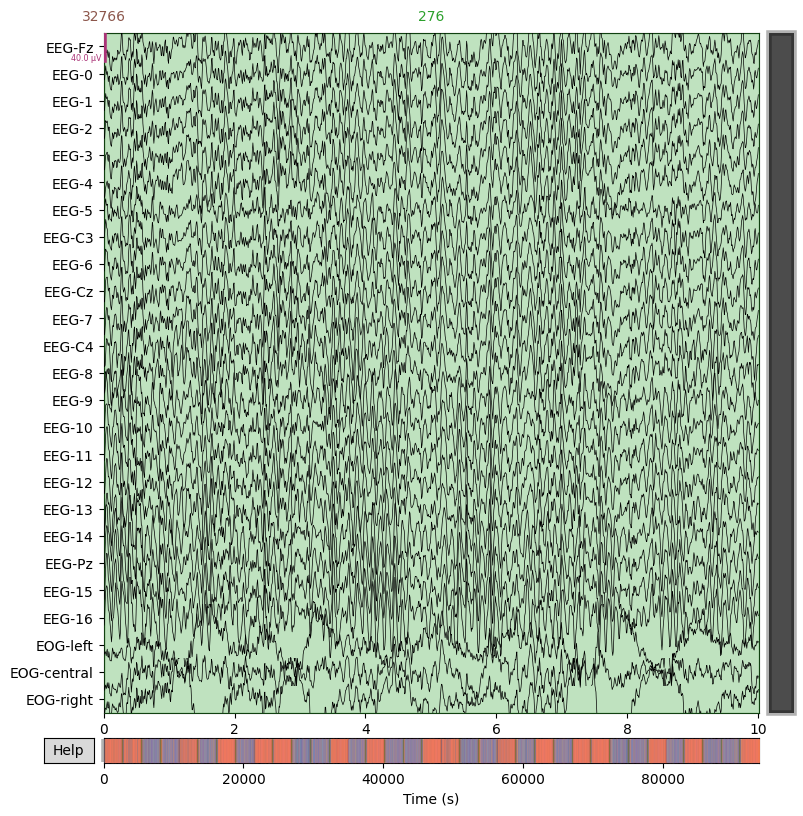

Extracting EDF parameters from /run/media/thomas/hdd/repos/deep-learning/midterm_project/data/eeg_data_A/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


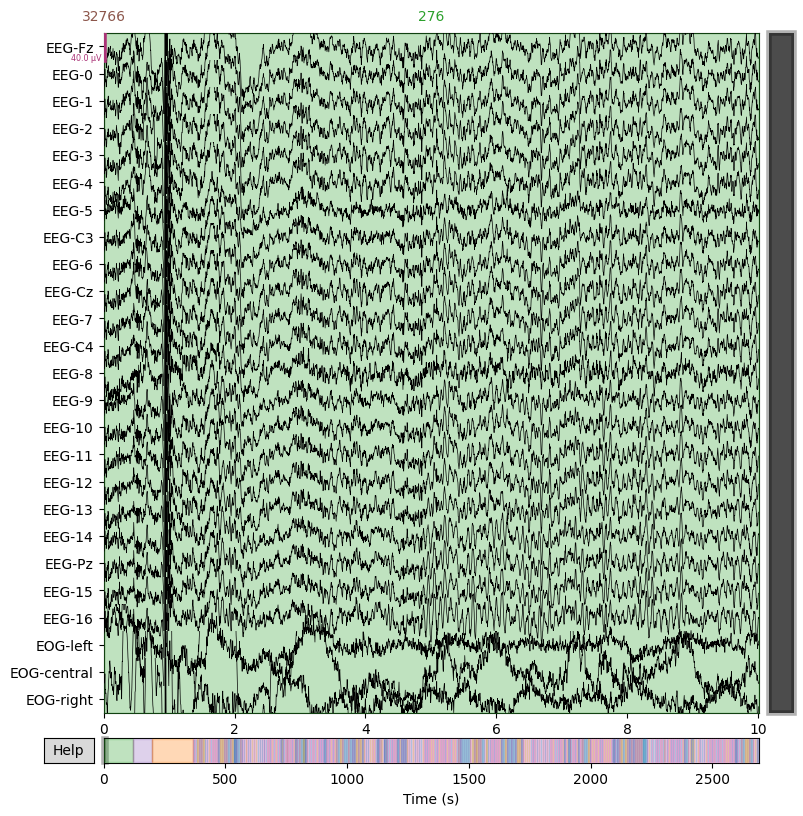

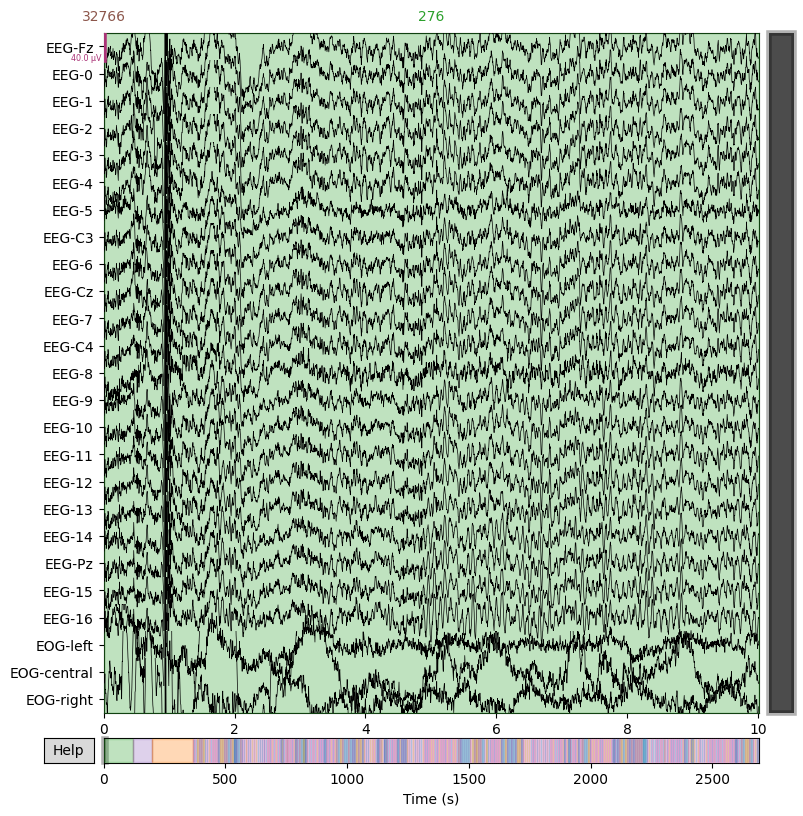

In [38]:
filtered_file = raw_objects[0]      
filtered_file.plot(duration=10, n_channels=25, title='Filtered EEG Data')

unfiltered_file = mne.io.read_raw_gdf('data/eeg_data_A/A01T.gdf', preload=True)
unfiltered_file.plot(duration=10, n_channels=25, title='Unfiltered EEG Data')

In [ ]:
# i ain't waiting for that again lmao
#np.save('data/filtered_eeg_array.npy', eeg_data_filtered)
"""
eeg_data_filtered = np.load('data/filtered_eeg_array.npy')

channel = 0

plt.figure(figsize=(15, 8))

# Plotting the original signal
plt.subplot(2, 1, 1)
plt.plot(eeg_data_unfiltered[channel], label='Original EEG')
plt.title('Original EEG Signal')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()

# Plotting the filtered signal
plt.subplot(2, 1, 2)
plt.plot(eeg_data_filtered[channel], label='Filtered EEG')
plt.title('Filtered EEG Signal')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
"""

#### Independent Component Analysis

In [ ]:
channels = 25
method = 'fastica'

ica = ICA(n_components=channels, method='fastica')
ica.fit(eeg_data_filtered)
ica.plot_components()
